In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns


# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/titanic/test.csv
/kaggle/input/titanic/train.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
df_trainval=pd.read_csv("/kaggle/input/titanic/train.csv")
df_test=pd.read_csv("/kaggle/input/titanic/test.csv")

In [3]:
df_trainval_C=df_trainval.copy()

In [4]:
print("df_trainval shape: ",df_trainval.shape)
print("df_test shape: ",df_test.shape)

df_trainval shape:  (891, 12)
df_test shape:  (418, 11)


In [5]:
df_trainval.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df_test.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [7]:
df_trainval_C.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
df_trainval.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


0    549
1    342
Name: Survived, dtype: int64


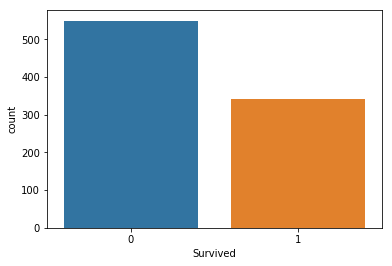

In [9]:
print(df_trainval["Survived"].value_counts())
sns.countplot(x="Survived",data=df_trainval)
plt.show()

% Of Males Survived: 18.890814558058924 %
% Of Females Survived: 74.20382165605095 %


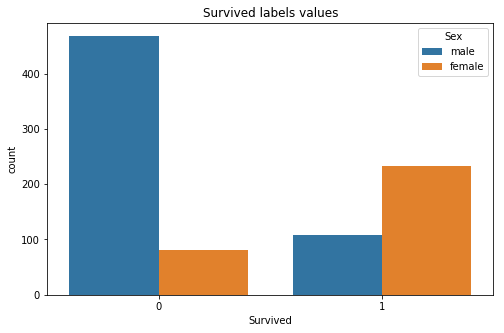

In [10]:
print("% Of Males Survived:",(((((df_trainval["Sex"]=="male")&(df_trainval["Survived"]==1)).astype(int)).sum())/(df_trainval["Sex"]=="male").astype(int).sum())*100,"%")
print("% Of Females Survived:",(((((df_trainval["Sex"]=="female")&(df_trainval["Survived"]==1)).astype(int)).sum())/(df_trainval["Sex"]=="female").astype(int).sum())*100,"%")
fig, ax = plt.subplots(figsize=(8, 5))
sns.countplot(df_trainval['Survived'],hue=df_trainval["Sex"])
plt.title('Survived labels values')
plt.show()

% Of Males Survived from class 1: 36.885245901639344 %
% Of Males Survived from class 2: 15.74074074074074 %
% Of Males Survived from class 3: 13.544668587896252 %
% Of Females Survived from class 1: 96.80851063829788 %
% Of Females Survived from class 2: 92.10526315789474 %
% Of Females Survived from class 3: 50.0 %


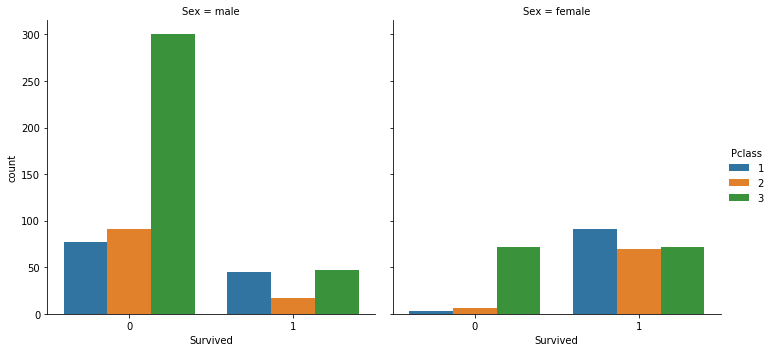

In [11]:
print("% Of Males Survived from class 1:",(((((df_trainval["Sex"]=="male")&(df_trainval["Survived"]==1)&(df_trainval["Pclass"]==1)).astype(int)).sum())/(((df_trainval["Sex"]=="male")&(df_trainval["Pclass"]==1)).astype(int)).sum())*100,"%")
print("% Of Males Survived from class 2:",(((((df_trainval["Sex"]=="male")&(df_trainval["Survived"]==1)&(df_trainval["Pclass"]==2)).astype(int)).sum())/(((df_trainval["Sex"]=="male")&(df_trainval["Pclass"]==2)).astype(int)).sum())*100,"%")
print("% Of Males Survived from class 3:",(((((df_trainval["Sex"]=="male")&(df_trainval["Survived"]==1)&(df_trainval["Pclass"]==3)).astype(int)).sum())/(((df_trainval["Sex"]=="male")&(df_trainval["Pclass"]==3)).astype(int)).sum())*100,"%")
print("% Of Females Survived from class 1:",(((((df_trainval["Sex"]=="female")&(df_trainval["Survived"]==1)&(df_trainval["Pclass"]==1)).astype(int)).sum())/(((df_trainval["Sex"]=="female")&(df_trainval["Pclass"]==1)).astype(int)).sum())*100,"%")
print("% Of Females Survived from class 2:",(((((df_trainval["Sex"]=="female")&(df_trainval["Survived"]==1)&(df_trainval["Pclass"]==2)).astype(int)).sum())/(((df_trainval["Sex"]=="female")&(df_trainval["Pclass"]==2)).astype(int)).sum())*100,"%")
print("% Of Females Survived from class 3:",(((((df_trainval["Sex"]=="female")&(df_trainval["Survived"]==1)&(df_trainval["Pclass"]==3)).astype(int)).sum())/(((df_trainval["Sex"]=="female")&(df_trainval["Pclass"]==3)).astype(int)).sum())*100,"%")
sns.catplot(x='Survived',hue="Pclass",col='Sex',kind="count",data=df_trainval)
plt.show()

In [12]:
df_trainval["Parch"].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

% of people survived with having 0 Parch:  34.365781710914455  %
% of people survived with having 1 Parch:  55.08474576271186  %
% of people survived with having 2 Parch:  50.0  %
% of people survived with having 3 Parch:  60.0  %
% of people survived with having 4 Parch:  0.0  %
% of people survived with having 5 Parch:  20.0  %
% of people survived with having 6 Parch:  0.0  %


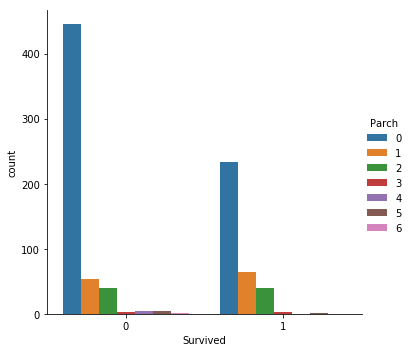

In [13]:
print("% of people survived with having 0 Parch: ",(((((df_trainval["Parch"]==0)&(df_trainval["Survived"]==1)).astype(int).sum())/(df_trainval["Parch"]==0).astype(int).sum()))*100," %")
print("% of people survived with having 1 Parch: ",(((((df_trainval["Parch"]==1)&(df_trainval["Survived"]==1)).astype(int).sum())/(df_trainval["Parch"]==1).astype(int).sum()))*100," %")
print("% of people survived with having 2 Parch: ",(((((df_trainval["Parch"]==2)&(df_trainval["Survived"]==1)).astype(int).sum())/(df_trainval["Parch"]==2).astype(int).sum()))*100," %")
print("% of people survived with having 3 Parch: ",(((((df_trainval["Parch"]==3)&(df_trainval["Survived"]==1)).astype(int).sum())/(df_trainval["Parch"]==3).astype(int).sum()))*100," %")
print("% of people survived with having 4 Parch: ",(((((df_trainval["Parch"]==4)&(df_trainval["Survived"]==1)).astype(int).sum())/(df_trainval["Parch"]==4).astype(int).sum()))*100," %")
print("% of people survived with having 5 Parch: ",(((((df_trainval["Parch"]==5)&(df_trainval["Survived"]==1)).astype(int).sum())/(df_trainval["Parch"]==5).astype(int).sum()))*100," %")
print("% of people survived with having 6 Parch: ",(((((df_trainval["Parch"]==6)&(df_trainval["Survived"]==1)).astype(int).sum())/(df_trainval["Parch"]==6).astype(int).sum()))*100," %")

sns.catplot(x='Survived',hue="Parch",kind="count",data=df_trainval)

In [14]:
df_trainval["SibSp"].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

% of people survived with having 0 Siblings:  34.53947368421053  %
% of people survived with having 1 Siblings:  53.588516746411486  %
% of people survived with having 2 Siblings:  46.42857142857143  %
% of people survived with having 3 Siblings:  25.0  %
% of people survived with having 4 Siblings:  16.666666666666664  %
% of people survived with having 5 Siblings:  0.0  %


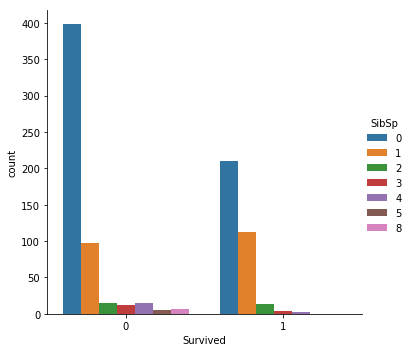

In [15]:
print("% of people survived with having 0 Siblings: ",(((((df_trainval["SibSp"]==0)&(df_trainval["Survived"]==1)).astype(int).sum())/(df_trainval["SibSp"]==0).astype(int).sum()))*100," %")
print("% of people survived with having 1 Siblings: ",(((((df_trainval["SibSp"]==1)&(df_trainval["Survived"]==1)).astype(int).sum())/(df_trainval["SibSp"]==1).astype(int).sum()))*100," %")
print("% of people survived with having 2 Siblings: ",(((((df_trainval["SibSp"]==2)&(df_trainval["Survived"]==1)).astype(int).sum())/(df_trainval["SibSp"]==2).astype(int).sum()))*100," %")
print("% of people survived with having 3 Siblings: ",(((((df_trainval["SibSp"]==3)&(df_trainval["Survived"]==1)).astype(int).sum())/(df_trainval["SibSp"]==3).astype(int).sum()))*100," %")
print("% of people survived with having 4 Siblings: ",(((((df_trainval["SibSp"]==4)&(df_trainval["Survived"]==1)).astype(int).sum())/(df_trainval["SibSp"]==4).astype(int).sum()))*100," %")
print("% of people survived with having 5 Siblings: ",(((((df_trainval["SibSp"]==5)&(df_trainval["Survived"]==1)).astype(int).sum())/(df_trainval["SibSp"]==5).astype(int).sum()))*100," %")
sns.catplot(x='Survived',hue="SibSp",kind="count",data=df_trainval)

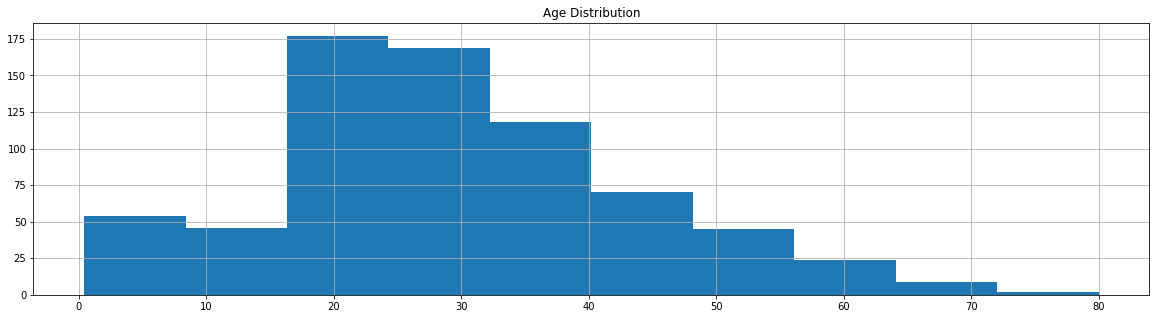

In [16]:
fig,ax=plt.subplots(figsize=(20,5))
df_trainval["Age"].hist()
plt.title("Age Distribution")
plt.show()

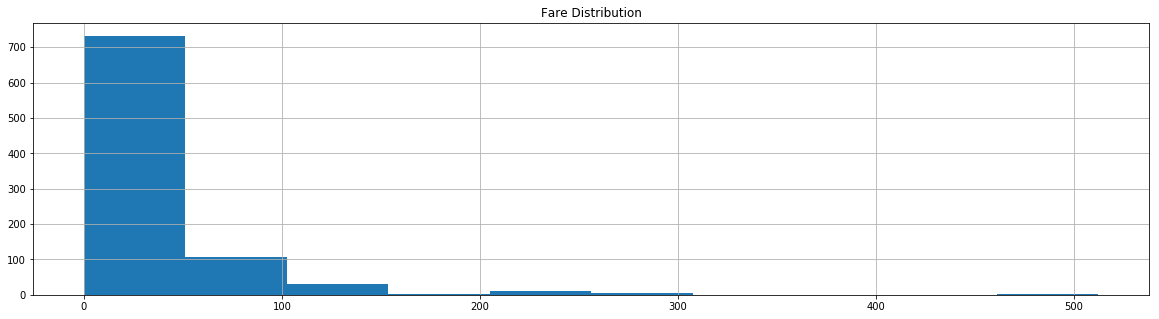

In [17]:
plt.subplots(figsize=(20,5))
df_trainval["Fare"].hist()
plt.title("Fare Distribution")
plt.show()

% Of male Survived with boarding at Southampton : 17.46031746031746 %
% Of female Survived with boarding at Southampton : 68.96551724137932 %
% Of male Survived with boarding at Cherbourg : 30.526315789473685 %
% Of female Survived with boarding at Cherbourg : 87.67123287671232 %
% Of female Survived with boarding at Queenstown : 7.317073170731707 %
% Of female Survived with boarding at Queenstown : 75.0 %


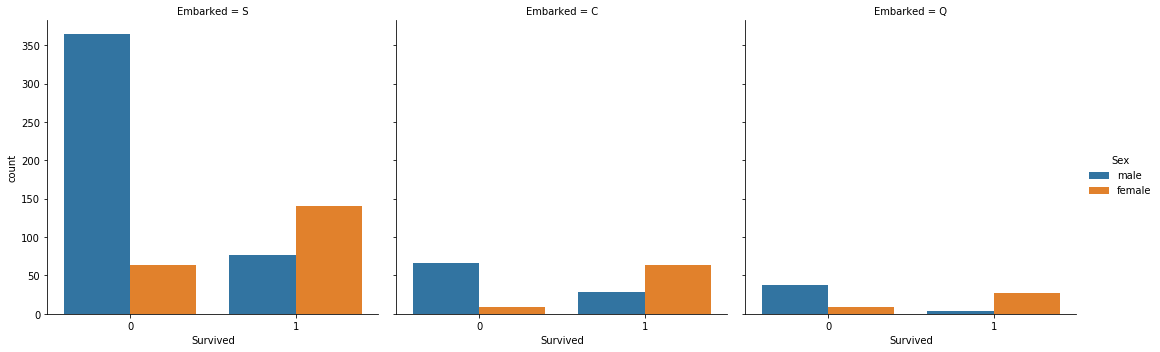

In [18]:
print("% Of male Survived with boarding at Southampton :",(((((df_trainval["Sex"]=="male")&(df_trainval["Survived"]==1)&(df_trainval["Embarked"]=="S")).astype(int)).sum())/(((df_trainval["Sex"]=="male")&(df_trainval["Embarked"]=="S")).astype(int)).sum())*100,"%")
print("% Of female Survived with boarding at Southampton :",(((((df_trainval["Sex"]=="female")&(df_trainval["Survived"]==1)&(df_trainval["Embarked"]=="S")).astype(int)).sum())/(((df_trainval["Sex"]=="female")&(df_trainval["Embarked"]=="S")).astype(int)).sum())*100,"%")
print("% Of male Survived with boarding at Cherbourg :",(((((df_trainval["Sex"]=="male")&(df_trainval["Survived"]==1)&(df_trainval["Embarked"]=="C")).astype(int)).sum())/(((df_trainval["Sex"]=="male")&(df_trainval["Embarked"]=="C")).astype(int)).sum())*100,"%")
print("% Of female Survived with boarding at Cherbourg :",(((((df_trainval["Sex"]=="female")&(df_trainval["Survived"]==1)&(df_trainval["Embarked"]=="C")).astype(int)).sum())/(((df_trainval["Sex"]=="female")&(df_trainval["Embarked"]=="C")).astype(int)).sum())*100,"%")
print("% Of female Survived with boarding at Queenstown :",(((((df_trainval["Sex"]=="male")&(df_trainval["Survived"]==1)&(df_trainval["Embarked"]=="Q")).astype(int)).sum())/(((df_trainval["Sex"]=="male")&(df_trainval["Embarked"]=="Q")).astype(int)).sum())*100,"%")
print("% Of female Survived with boarding at Queenstown :",(((((df_trainval["Sex"]=="female")&(df_trainval["Survived"]==1)&(df_trainval["Embarked"]=="Q")).astype(int)).sum())/(((df_trainval["Sex"]=="female")&(df_trainval["Embarked"]=="Q")).astype(int)).sum())*100,"%")
sns.catplot(x='Survived',col="Embarked",hue="Sex",kind="count",data=df_trainval)
plt.show() 

In [19]:
df_trainval["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [20]:
df_trainval["Sex_labels"],Sex_uniques=pd.factorize(df_trainval["Sex"])
df_trainval.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_labels
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [21]:
df_trainval["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [22]:
df_trainval["Pclass_labels"],Pclass_uniques=pd.factorize(df_trainval["Pclass"])
df_trainval.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_labels,Pclass_labels
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0


In [23]:
Age_mean=df_trainval["Age"].mean()
df_trainval["Age"].fillna(Age_mean,inplace=True)

In [24]:
a,age_bins=pd.qcut(df_trainval["Age"],7,retbins=True)
df_trainval["Age_label"],Age_unique=pd.factorize(a)
df_trainval.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_labels,Pclass_labels,Age_label
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,1,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,1,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0,1


In [25]:
df_trainval["Age_label"].value_counts()

3    177
5    139
0    138
1    127
4    124
2    107
6     79
Name: Age_label, dtype: int64

In [26]:
age_cat=[]
for i in range(7):
    i1=age_bins[i]
    i2=age_bins[i+1]
    age_cat.append(str(i)+"  :  "+i1.astype(str)+"-"+i2.astype(str))


age_bins:  ['0  :  0.42-18.0', '1  :  18.0-24.0', '2  :  24.0-29.0', '3  :  29.0-29.69911764705882', '4  :  29.69911764705882-33.0', '5  :  33.0-43.0', '6  :  43.0-80.0']


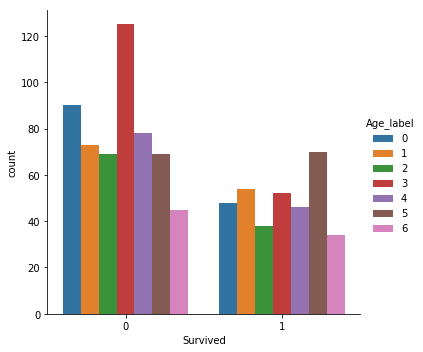

In [27]:
print("age_bins: ",age_cat)
sns.catplot(x='Survived',hue="Age_label",kind="count",data=df_trainval)
plt.show()

In [28]:
df_trainval.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_labels,Pclass_labels,Age_label
PassengerId,1.000000,-0.005007,-0.035144,0.033207,-0.057527,-0.001652,0.012658,-0.042939,0.018305,0.056349
Survived,-0.005007,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307,0.543351,0.247845,0.060876
Pclass,-0.035144,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500,-0.131900,-0.665866,-0.011309
Age,0.033207,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566,-0.084153,0.178203,-0.018973
SibSp,-0.057527,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651,0.114631,-0.085918,0.152565
Parch,-0.001652,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225,0.245489,-0.010198,0.086303
Fare,0.012658,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000,0.182333,0.197168,-0.024424
Sex_labels,-0.042939,0.543351,-0.131900,-0.084153,0.114631,0.245489,0.182333,1.000000,0.118133,0.050523
Pclass_labels,0.018305,0.247845,-0.665866,0.178203,-0.085918,-0.010198,0.197168,0.118133,1.000000,-0.005061
Age_label,0.056349,0.060876,-0.011309,-0.018973,0.152565,0.086303,-0.024424,0.050523,-0.005061,1.000000


In [29]:
df_trainval["Parch"].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [30]:
df_trainval["(Sex_labels+1)/Parch"]=(df_trainval["Sex_labels"]+1)/df_trainval["Pclass"]
df_trainval["Parch+SibSp+1"]=df_trainval["SibSp"]+df_trainval["Parch"]+1
df_trainval["Pclass-Parch"]=df_trainval["Pclass"]-df_trainval["Parch"]
df_trainval["Parch+SibSp+sex_label"]=df_trainval["SibSp"]+df_trainval["Parch"]+df_trainval["Sex_labels"]
df_trainval.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_labels,Pclass_labels,Age_label,(Sex_labels+1)/Parch,Parch+SibSp+1,Pclass-Parch,Parch+SibSp+sex_label
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,0,0.333333,2,3,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,1,1,2.000000,2,1,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0,2,0.666667,1,3,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,1,1,2.000000,2,1,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0,1,0.333333,1,3,0


In [31]:
df_trainval["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [32]:
df_trainval["Embarked_label"],Embarked_unique=pd.factorize(df_trainval["Embarked"])
df_trainval.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_labels,Pclass_labels,Age_label,(Sex_labels+1)/Parch,Parch+SibSp+1,Pclass-Parch,Parch+SibSp+sex_label,Embarked_label
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,0,0.333333,2,3,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,1,1,2.000000,2,1,2,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0,2,0.666667,1,3,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,1,1,2.000000,2,1,2,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0,1,0.333333,1,3,0,0


In [33]:
b,Fare_bins=pd.qcut(df_trainval["Fare"],5,retbins=True)
df_trainval["Fare_labels"],Fare_unique=pd.factorize(b)
df_trainval.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,Sex_labels,Pclass_labels,Age_label,(Sex_labels+1)/Parch,Parch+SibSp+1,Pclass-Parch,Parch+SibSp+sex_label,Embarked_label,Fare_labels
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,S,0,0,0,0.333333,2,3,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,C,1,1,1,2.000000,2,1,2,1,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,S,1,0,2,0.666667,1,3,1,0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,S,1,1,1,2.000000,2,1,2,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,S,0,0,1,0.333333,1,3,0,0,2


In [34]:
df_trainval["Fare_labels"].value_counts()

2    184
4    180
0    179
1    176
3    172
Name: Fare_labels, dtype: int64

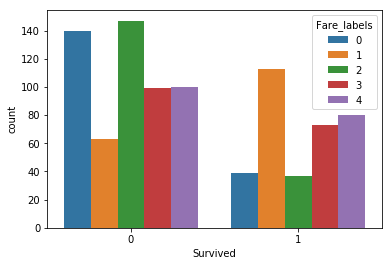

In [35]:
sns.countplot(x="Survived",hue="Fare_labels",data=df_trainval)
plt.show()

In [36]:
df_trainval["Fare_labels*(Sex_labels+1)"]=df_trainval["Fare_labels"]*(df_trainval["Sex_labels"]+1)

In [37]:
X_trainval=df_trainval.drop(columns=["Survived","Sex","Fare","Embarked","Cabin","Name","Ticket","PassengerId","Age","Pclass"])
Y_trainval=df_trainval["Survived"]
print("X_trainval shape:  ",X_trainval.shape)
print("Y_trainval shape:  ",Y_trainval.shape)

X_trainval shape:   (891, 12)
Y_trainval shape:   (891,)


In [38]:
from sklearn.model_selection import train_test_split
X_train1,X_val1,Y_train1,Y_val1=train_test_split(X_trainval,Y_trainval,test_size=0.2,random_state=42)
print("X_train shape: ",X_train1.shape)
print("X_val shape: ",X_val1.shape)
print("Y_train shape: ",Y_train1.shape)
print("Y_val shape: ",Y_val1.shape)

X_train shape:  (712, 12)
X_val shape:  (179, 12)
Y_train shape:  (712,)
Y_val shape:  (179,)


In [39]:
from sklearn.linear_model import LogisticRegression
model1=LogisticRegression()
model1.fit(X_train1,Y_train1)
print("train set Accuracy: ",model1.score(X_train1,Y_train1))
print("test set Accuracy: ",model1.score(X_val1,Y_val1))

train set Accuracy:  0.8061797752808989
test set Accuracy:  0.7821229050279329


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [40]:
from sklearn.metrics import confusion_matrix
Y_val1_predict= model1.predict(X_val1)
print(confusion_matrix(Y_val1,Y_val1_predict))

[[90 15]
 [24 50]]


In [41]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
standard_scaled_features=scaler.fit_transform(X_trainval)
X_trainval_2=pd.DataFrame(standard_scaled_features,index=X_trainval.index,columns=X_trainval.columns)
X_trainval_2.head()


,SibSp,Parch,Sex_labels,Pclass_labels,Age_label,(Sex_labels+1)/Parch,Parch+SibSp+1,Pclass-Parch,Parch+SibSp+sex_label,Embarked_label,Fare_labels,Fare_labels*(Sex_labels+1)
0,0.432793,-0.473674,-0.737695,-0.820037,-1.496118,-0.788735,0.059160,0.933037,-0.145083,-0.562619,-1.411836,-1.197599
1,0.432793,-0.473674,1.355574,0.431081,-0.970678,2.513724,0.059160,-0.806159,0.419411,1.003923,-0.705125,-0.328657
2,-0.474545,-0.473674,1.355574,-0.820037,-0.445238,-0.128244,-0.560975,0.933037,-0.145083,-0.562619,0.001586,0.540285
3,0.432793,-0.473674,1.355574,0.431081,-0.970678,2.513724,0.059160,-0.806159,0.419411,-0.562619,-0.705125,-0.328657
4,-0.474545,-0.473674,-0.737695,-0.820037,-0.970678,-0.788735,-0.560975,0.933037,-0.709577,-0.562619,0.001586,-0.328657


In [42]:
X_train2,X_val2,Y_train2,Y_val2=train_test_split(X_trainval_2,Y_trainval,test_size=0.2,random_state=42)
print("X_train shape: ",X_train2.shape)
print("X_val shape: ",X_val2.shape)
print("Y_train shape: ",Y_train2.shape)
print("Y_val shape: ",Y_val2.shape)

X_train shape:  (712, 12)
X_val shape:  (179, 12)
Y_train shape:  (712,)
Y_val shape:  (179,)


In [43]:
model2=LogisticRegression()
model2.fit(X_train2,Y_train2)
print("train set Accuracy: ",model2.score(X_train2,Y_train2))
print("test set Accuracy: ",model1.score(X_val2,Y_val2))

train set Accuracy:  0.8117977528089888
test set Accuracy:  0.7821229050279329


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [44]:
Y_val2_predict= model2.predict(X_val2)
print(confusion_matrix(Y_val2,Y_val2_predict))

[[90 15]
 [25 49]]


In [45]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
minmax_scaled_features=scaler.fit_transform(X_trainval)
X_trainval_3=pd.DataFrame(minmax_scaled_features,index=X_trainval.index,columns=X_trainval.columns)
X_trainval_3.head()


,SibSp,Parch,Sex_labels,Pclass_labels,Age_label,(Sex_labels+1)/Parch,Parch+SibSp+1,Pclass-Parch,Parch+SibSp+sex_label,Embarked_label,Fare_labels,Fare_labels*(Sex_labels+1)
0,0.125,0.0,0.0,0.0,0.000000,0.0,0.1,1.000000,0.090909,0.333333,0.00,0.00
1,0.125,0.0,1.0,0.5,0.166667,1.0,0.1,0.666667,0.181818,0.666667,0.25,0.25
2,0.000,0.0,1.0,0.0,0.333333,0.2,0.0,1.000000,0.090909,0.333333,0.50,0.50
3,0.125,0.0,1.0,0.5,0.166667,1.0,0.1,0.666667,0.181818,0.333333,0.25,0.25
4,0.000,0.0,0.0,0.0,0.166667,0.0,0.0,1.000000,0.000000,0.333333,0.50,0.25


In [46]:
X_train3,X_val3,Y_train3,Y_val3=train_test_split(X_trainval_3,Y_trainval,test_size=0.2,random_state=42)
print("X_train shape: ",X_train3.shape)
print("X_val shape: ",X_val3.shape)
print("Y_train shape: ",Y_train3.shape)
print("Y_val shape: ",Y_val3.shape)

X_train shape:  (712, 12)
X_val shape:  (179, 12)
Y_train shape:  (712,)
Y_val shape:  (179,)


In [47]:
model3=LogisticRegression()
model3.fit(X_train3,Y_train3)
print("train set Accuracy: ",model3.score(X_train3,Y_train3))
print("test set Accuracy: ",model3.score(X_val3,Y_val3))

train set Accuracy:  0.8075842696629213
test set Accuracy:  0.7821229050279329


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [48]:
Y_val3_predict= model3.predict(X_val3)
print(confusion_matrix(Y_val3,Y_val3_predict))

[[90 15]
 [24 50]]


In [49]:
#SVM On Normal Data
from sklearn.svm import LinearSVC
model4=LinearSVC()
model4.fit(X_train1,Y_train1)
print("train set Accuracy: ",model4.score(X_train1,Y_train1))
print("test set Accuracy: ",model4.score(X_val1,Y_val1))

train set Accuracy:  0.8075842696629213
test set Accuracy:  0.7877094972067039


/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [50]:
Y_val4_predict= model4.predict(X_val1)
print(confusion_matrix(Y_val1,Y_val4_predict))

[[90 15]
 [23 51]]


In [51]:
#SVM On StandardScaled  Data
model5=LinearSVC()
model5.fit(X_train2,Y_train2)
print("train set Accuracy: ",model5.score(X_train2,Y_train2))
print("test set Accuracy: ",model5.score(X_val2,Y_val2))

train set Accuracy:  0.8075842696629213
test set Accuracy:  0.7877094972067039


/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [52]:
Y_val5_predict= model5.predict(X_val2)
print(confusion_matrix(Y_val2,Y_val5_predict))

[[90 15]
 [23 51]]


In [53]:
#SVM On MinMaxScaled Data
model6=LinearSVC()
model6.fit(X_train3,Y_train3)
print("train set Accuracy: ",model6.score(X_train3,Y_train3))
print("test set Accuracy: ",model6.score(X_val3,Y_val3))

train set Accuracy:  0.8061797752808989
test set Accuracy:  0.7877094972067039


In [54]:
#Decision Tree On Normal Data
from sklearn.tree import DecisionTreeClassifier
model7=DecisionTreeClassifier(max_depth=9,min_samples_split=8,min_samples_leaf=2)
model7.fit(X_train1,Y_train1)
print("train set Accuracy: ",model7.score(X_train1,Y_train1))
print("test set Accuracy: ",model7.score(X_val1,Y_val1))

train set Accuracy:  0.8651685393258427
test set Accuracy:  0.8268156424581006


In [55]:
Y_val7_predict= model7.predict(X_val1)
print(confusion_matrix(Y_val1,Y_val7_predict))

[[91 14]
 [17 57]]


In [56]:
#Decision Tree On StandardScaler Data
model8=DecisionTreeClassifier(max_depth=9,min_samples_split=8,min_samples_leaf=2)
model8.fit(X_train2,Y_train2)
print("train set Accuracy: ",model8.score(X_train2,Y_train2))
print("test set Accuracy: ",model8.score(X_val2,Y_val2))

train set Accuracy:  0.8623595505617978
test set Accuracy:  0.8379888268156425


In [57]:
Y_val8_predict= model8.predict(X_val2)
print(confusion_matrix(Y_val2,Y_val8_predict))

[[93 12]
 [17 57]]


In [58]:
#Decision Tree On MinMax Scaled Data
model9=DecisionTreeClassifier(max_depth=9,min_samples_split=8,min_samples_leaf=2)
model9.fit(X_train3,Y_train3)
print("train set Accuracy: ",model9.score(X_train3,Y_train3))
print("test set Accuracy: ",model9.score(X_val3,Y_val3))

train set Accuracy:  0.8623595505617978
test set Accuracy:  0.8491620111731844


In [59]:
Y_val9_predict= model9.predict(X_val3)
print(confusion_matrix(Y_val3,Y_val9_predict))

[[95 10]
 [17 57]]


In [60]:
#Random Forest On Normal Data
from sklearn.ensemble import RandomForestClassifier
model10=RandomForestClassifier(n_estimators=500,max_leaf_nodes=70)
model10.fit(X_train1,Y_train1)
print("train set Accuracy: ",model10.score(X_train1,Y_train1))
print("test set Accuracy: ",model10.score(X_val1,Y_val1))

train set Accuracy:  0.8904494382022472
test set Accuracy:  0.8435754189944135


In [61]:
#Random Forest On StandardScaler Data
model11=RandomForestClassifier(n_estimators=500,max_leaf_nodes=70)
model11.fit(X_train2,Y_train2)
print("train set Accuracy: ",model11.score(X_train2,Y_train2))
print("test set Accuracy: ",model11.score(X_val2,Y_val2))

train set Accuracy:  0.8862359550561798
test set Accuracy:  0.8435754189944135


In [62]:
#Random Forest On MinMax Scaled Data
model12=RandomForestClassifier(n_estimators=500,max_leaf_nodes=70)
model12.fit(X_train3,Y_train3)
print("train set Accuracy: ",model12.score(X_train3,Y_train3))
print("test set Accuracy: ",model12.score(X_val3,Y_val3))

train set Accuracy:  0.8862359550561798
test set Accuracy:  0.8435754189944135


In [63]:
import tensorflow as tf
from keras.layers import Dense, Activation,LeakyReLU
from keras.models import Sequential
from keras import backend as K
K.clear_session()
tf.reset_default_graph()


/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

In [64]:

model13 = Sequential()  
model13.add(Dense(8,input_shape=(12,)))  
model13.add(Activation('sigmoid'))
model13.add(Dense(16))
model13.add(Activation('sigmoid'))
model13.add(Dense(32))
model13.add(Activation('sigmoid'))
model13.add(Dense(2))
model13.add(Activation('sigmoid'))
model13.add(Dense(1))
model13.add(Activation('sigmoid'))

In [65]:
model13.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 8)                 104       
_________________________________________________________________
activation_1 (Activation)    (None, 8)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                144       
_________________________________________________________________
activation_2 (Activation)    (None, 16)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 32)                544       
_________________________________________________________________
activation_3 (Activation)    (None, 32)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 66        
__________

In [66]:
model13.compile(
    loss='mean_squared_error', 
    optimizer='adagrad',
    metrics=['accuracy']
)

In [67]:
model13.fit(
    X_train3, 
    Y_train3,
    batch_size=9, 
    epochs=150,
    validation_split=0.6
)

Train on 284 samples, validate on 428 samples
Epoch 1/150
284/284 [==============================] - 1s 2ms/step - loss: 0.2392 - acc: 0.6127 - val_loss: 0.2341 - val_acc: 0.6308
Epoch 2/150
284/284 [==============================] - 0s 237us/step - loss: 0.2377 - acc: 0.6127 - val_loss: 0.2336 - val_acc: 0.6308
Epoch 3/150
284/284 [==============================] - 0s 222us/step - loss: 0.2373 - acc: 0.6127 - val_loss: 0.2332 - val_acc: 0.6308
Epoch 4/150
284/284 [==============================] - 0s 221us/step - loss: 0.2371 - acc: 0.6127 - val_loss: 0.2329 - val_acc: 0.6308
Epoch 5/150
284/284 [==============================] - 0s 218us/step - loss: 0.2371 - acc: 0.6127 - val_loss: 0.2328 - val_acc: 0.6308
Epoch 6/150
284/284 [==============================] - 0s 231us/step - loss: 0.2369 - acc: 0.6127 - val_loss: 0.2327 - val_acc: 0.6308
Epoch 7/150
284/284 [==============================] - 0s 212us/step - loss: 0.2368 - acc: 0.6127 - val_loss: 0.2325 - val_acc: 0.6308
Epoch 8/150

Epoch 61/150
284/284 [==============================] - 0s 215us/step - loss: 0.2036 - acc: 0.6127 - val_loss: 0.2032 - val_acc: 0.6308
Epoch 62/150
284/284 [==============================] - 0s 222us/step - loss: 0.2027 - acc: 0.6127 - val_loss: 0.2024 - val_acc: 0.6355
Epoch 63/150
284/284 [==============================] - 0s 214us/step - loss: 0.2018 - acc: 0.6197 - val_loss: 0.2017 - val_acc: 0.6706
Epoch 64/150
284/284 [==============================] - 0s 209us/step - loss: 0.2008 - acc: 0.6972 - val_loss: 0.2009 - val_acc: 0.7220
Epoch 65/150
284/284 [==============================] - 0s 215us/step - loss: 0.2000 - acc: 0.7077 - val_loss: 0.2002 - val_acc: 0.7290
Epoch 66/150
284/284 [==============================] - 0s 217us/step - loss: 0.1991 - acc: 0.7394 - val_loss: 0.1994 - val_acc: 0.7313
Epoch 67/150
284/284 [==============================] - 0s 237us/step - loss: 0.1982 - acc: 0.7500 - val_loss: 0.1987 - val_acc: 0.7430
Epoch 68/150
284/284 [==========================

284/284 [==============================] - 0s 216us/step - loss: 0.1719 - acc: 0.7993 - val_loss: 0.1787 - val_acc: 0.7780
Epoch 122/150
284/284 [==============================] - 0s 217us/step - loss: 0.1716 - acc: 0.7993 - val_loss: 0.1785 - val_acc: 0.7780
Epoch 123/150
284/284 [==============================] - 0s 207us/step - loss: 0.1714 - acc: 0.7993 - val_loss: 0.1783 - val_acc: 0.7780
Epoch 124/150
284/284 [==============================] - 0s 214us/step - loss: 0.1711 - acc: 0.7993 - val_loss: 0.1782 - val_acc: 0.7780
Epoch 125/150
284/284 [==============================] - 0s 218us/step - loss: 0.1709 - acc: 0.7993 - val_loss: 0.1781 - val_acc: 0.7780
Epoch 126/150
284/284 [==============================] - 0s 217us/step - loss: 0.1707 - acc: 0.7993 - val_loss: 0.1779 - val_acc: 0.7780
Epoch 127/150
284/284 [==============================] - 0s 212us/step - loss: 0.1705 - acc: 0.7993 - val_loss: 0.1778 - val_acc: 0.7780
Epoch 128/150
284/284 [==============================] 

In [68]:
print("test set Accuracy: ",model13.evaluate(x=X_val3, y=Y_val3, batch_size=2, verbose=1))

179/179 [==============================] - 0s 262us/step
test set Accuracy:  [0.1754190557162855, 0.7877094972067039]


In [69]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [70]:
g1=df_test["PassengerId"]
df_test["Sex_labels"],Sex_test_uniques=pd.factorize(df_test["Sex"])
df_test.drop(columns=["Sex"],inplace=True)
df_test["Pclass_labels"],Pclass_test_uniques=pd.factorize(df_test["Pclass"])
df_test["Age"].fillna(Age_mean,inplace=True)
a1=pd.qcut(df_test["Age"],6)
df_test["Age_label"],Age_test_unique=pd.factorize(a1)
df_test.drop(columns=["Age"],inplace=True)
df_test.drop(columns=["Cabin","Name","Ticket","PassengerId"],inplace=True)
df_test["(Sex_labels+1)/Parch"]=(df_test["Sex_labels"]+1)/df_test["Pclass"]
df_test["Parch+SibSp+1"]=df_test["SibSp"]+df_test["Parch"]+1
df_test["Pclass-Parch"]=df_test["Pclass"]-df_test["Parch"]
df_test["Parch+SibSp+sex_label"]=df_test["SibSp"]+df_test["Parch"]+df_test["Sex_labels"]
df_test["Embarked_label"],Embarked_test_unique=pd.factorize(df_test["Embarked"])
df_test.drop(columns=["Embarked"],inplace=True)
a2=pd.qcut(df_test["Fare"],5)
df_test["Fare_labels"],Fare_uniques=pd.factorize(a2)
df_test.drop(columns=["Fare"],inplace=True)
df_test.drop(columns=["Pclass"],inplace=True)
df_test["Fare_labels*(Sex_labels+1)"]=df_test["Fare_labels"]*(df_test["Sex_labels"]+1)
df_test["Parch+SibSp+sex_label"]=df_test["SibSp"]+df_test["Parch"]+df_test["Sex_labels"]







In [71]:
df_test.head()

,SibSp,Parch,Sex_labels,Pclass_labels,Age_label,(Sex_labels+1)/Parch,Parch+SibSp+1,Pclass-Parch,Parch+SibSp+sex_label,Embarked_label,Fare_labels,Fare_labels*(Sex_labels+1)
0,0,0,0,0,0,0.333333,1,3,0,0,0,0
1,1,0,1,0,1,0.666667,2,3,2,1,1,2
2,0,0,0,1,1,0.500000,1,2,0,0,0,0
3,0,0,0,0,2,0.333333,1,3,0,1,0,0
4,1,1,1,0,3,0.666667,3,2,3,1,2,4


In [72]:
#Simple Logistic Regression
result_1=model1.predict(df_test)
Result_logistic_Regression=pd.DataFrame({'PassengerId':g1,'Survived':result_1})
Result_logistic_Regression.to_csv("Result_logistic_Regression_1.csv",index=False,header=True)

In [73]:
scaler=StandardScaler()
df_test_2=scaler.fit_transform(df_test)

In [74]:
#Simple Logistic Regression with standardscaler
result_2=model2.predict(df_test_2)
Result_logistic_Regression_2=pd.DataFrame({'PassengerId':g1,'Survived':result_2})
Result_logistic_Regression_2.to_csv("Result_logistic_Regression_2.csv",index=False,header=True)

In [75]:
scaler=MinMaxScaler()
df_test_3=scaler.fit_transform(df_test)

In [76]:
#Simple Logistic Regression with minmaxscaler
result_3=model3.predict(df_test_3)
Result_logistic_Regression_3=pd.DataFrame({'PassengerId':g1,'Survived':result_3})
Result_logistic_Regression_3.to_csv("Result_logistic_Regression_3.csv",index=False,header=True)

In [77]:
#SVM On Normal Data
result_4=model4.predict(df_test)
Result_logistic_Regression_4=pd.DataFrame({'PassengerId':g1,'Survived':result_4})
Result_logistic_Regression_4.to_csv("Result_SVM_1.csv",index=False,header=True)

In [78]:
#SVM On StandardScaled  Data
result_5=model5.predict(df_test_2)
Result_logistic_Regression_5=pd.DataFrame({'PassengerId':g1,'Survived':result_5})
Result_logistic_Regression_5.to_csv("Result_SVM_2.csv",index=False,header=True)

In [79]:
#SVM On MinMaxScaled Data
result_6=model6.predict(df_test_3)
Result_logistic_Regression_6=pd.DataFrame({'PassengerId':g1,'Survived':result_6})
Result_logistic_Regression_6.to_csv("Result_SVM_3.csv",index=False,header=True)

In [80]:
#Decision Tree On Normal Data
result_7=model7.predict(df_test)
Result_logistic_Regression_7=pd.DataFrame({'PassengerId':g1,'Survived':result_7})
Result_logistic_Regression_7.to_csv("Result_Decision_tree_1.csv",index=False,header=True)

In [81]:
#Decision Tree On StandardScaler Data
result_8=model8.predict(df_test_2)
Result_logistic_Regression_8=pd.DataFrame({'PassengerId':g1,'Survived':result_8})
Result_logistic_Regression_8.to_csv("Result_Decision_tree_2.csv",index=False,header=True)

In [82]:
#Decision Tree On MinMax Scaled Data
result_9=model9.predict(df_test_3)
Result_logistic_Regression_9=pd.DataFrame({'PassengerId':g1,'Survived':result_9})
Result_logistic_Regression_9.to_csv("Result_Decision_tree_3.csv",index=False,header=True)

In [83]:
#Random Forest On Normal Data
result_10=model10.predict(df_test)
Result_logistic_Regression_10=pd.DataFrame({'PassengerId':g1,'Survived':result_10})
Result_logistic_Regression_10.to_csv("Result_Random_Forest_1.csv",index=False,header=True)

In [84]:
#Random Forest On StandardScale Data
result_11=model11.predict(df_test_2)
Result_logistic_Regression_11=pd.DataFrame({'PassengerId':g1,'Survived':result_11})
Result_logistic_Regression_11.to_csv("Result_Random_Forest_2.csv",index=False,header=True)

In [85]:
#Random Forest On MinMax Scaled Data
result_12=model12.predict(df_test_3)
Result_logistic_Regression_12=pd.DataFrame({'PassengerId':g1,'Survived':result_12})
Result_logistic_Regression_12.to_csv("Result_Random_Forest_3.csv",index=False,header=True)

In [86]:
result_12.shape

(418,)

In [87]:
#Random Forest On MinMax Scaled Data
result_12=model12.predict(df_test_3)
Result_logistic_Regression_12=pd.DataFrame({'PassengerId':g1,'Survived':result_12})
Result_logistic_Regression_12.to_csv("Result_Random_Forest_3.csv",index=False,header=True)

In [88]:
#Neural Network On MinMax Scaled Data
result_13=(model13.predict(df_test_3)>0.5).astype(int)
result_13=result_13.squeeze()
Result_logistic_Regression_13=pd.DataFrame({'PassengerId':g1,'Survived':result_13})
Result_logistic_Regression_13.to_csv("Neural_Network_3.csv",index=False,header=True)

In [89]:
X_trainval.columns

Index(['SibSp', 'Parch', 'Sex_labels', 'Pclass_labels', 'Age_label',
       '(Sex_labels+1)/Parch', 'Parch+SibSp+1', 'Pclass-Parch',
       'Parch+SibSp+sex_label', 'Embarked_label', 'Fare_labels',
       'Fare_labels*(Sex_labels+1)'],
      dtype='object')

In [90]:
df_test.columns

Index(['SibSp', 'Parch', 'Sex_labels', 'Pclass_labels', 'Age_label',
       '(Sex_labels+1)/Parch', 'Parch+SibSp+1', 'Pclass-Parch',
       'Parch+SibSp+sex_label', 'Embarked_label', 'Fare_labels',
       'Fare_labels*(Sex_labels+1)'],
      dtype='object')